<a href="https://colab.research.google.com/github/kgpark88/musicapp-review-analysis/blob/main/review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 뮤직앱 리뷰 분석
#### 참조
- https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/
- https://github.com/wikibook/textmining

### 라이브러리 임포트

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 데이터셋 로드

In [2]:
# df = pd.read_csv("./dataset/genie_play.csv")
df = pd.read_csv("https://raw.githubusercontent.com/kgpark88/musicapp-review-analysis/main/dataset/genie_play.csv")

In [3]:
df.head()

,Unnamed: 0,at,score,thumbsUpCount,content
0,0,2022-04-25,5,0,지니뮤직 자체가이상합니다 단말기오디오라는 말이뜨는데 노래가 자꾸 끊어집니다 하루빨리...
1,1,2022-04-23,1,0,노래 재생중에 다른 영상봐도 노래 계속 나오게 하는거 왜 안보여요?
2,2,2022-04-23,5,0,좋은데 다른노래 없나요?
3,3,2022-04-22,1,1,멜론쓸땐 못느꼈는데 진짜 반응속도나 검색속도진짜 더럽게느리고 끊기는느낌이네요 앱개선...
4,4,2022-04-22,1,0,썼던 음악어플 중 최악입니다.


In [4]:
df.shape

(28448, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28448 entries, 0 to 28447
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     28448 non-null  int64 
 1   at             28448 non-null  object
 2   score          28448 non-null  int64 
 3   thumbsUpCount  28448 non-null  int64 
 4   content        28424 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


### 결측지 삭제

In [6]:
# 결측치
df.isnull().sum()

Unnamed: 0        0
at                0
score             0
thumbsUpCount     0
content          24
dtype: int64

In [7]:
df = df.dropna(axis=0)
df.isnull().sum()

Unnamed: 0       0
at               0
score            0
thumbsUpCount    0
content          0
dtype: int64

### 한글 텍스트 데이터 전처리

In [8]:
!pip install konlpy==0.5.2

In [9]:
# konlpy 설치
!pip install jpype1 Jpype1-py3

In [17]:
!wget  https://raw.githubusercontent.com/kgpark88/musicapp-review-analysis/main/jvm.py

--2022-05-18 16:59:05--  https://raw.githubusercontent.com/kgpark88/musicapp-review-analysis/main/jvm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2058 (2.0K) [text/plain]
Saving to: ‘jvm.py.3’

jvm.py.3            100%[===================>]   2.01K  --.-KB/s    in 0s      

2022-05-18 16:59:05 (37.1 MB/s) - ‘jvm.py.3’ saved [2058/2058]



In [25]:
!cp jvm.py.3 /usr/local/lib/python3.7/dist-packages/konlpy/jvm.py

cp: cannot create regular file '/usr/local/lib/python3/dist-packages/konlpy/jvm.py': No such file or directory
cp: cannot create regular file '/usr/local/lib/python3.6/dist-packages/konlpy/jvm.py': No such file or directory
cp: cannot create regular file '/usr/local/lib/python3.8/dist-packages/konlpy/jvm.py': No such file or directory


In [11]:
|# 한글 텍스트 추출 함수 : 공백을 포함한 한글만 추출
def hangul(text):
    p = re.compile('[^ ㄱ-ㅣ 가-힣]')  
    result = p.sub('', text)  
    return result

In [12]:
df['content'][8]

'가사 오타 수정 언제해줄꺼예요?? 힘들면 그냥 유저들이 변경하게 해달라니깐 용량 커 음질 별로야 겁나 느려 가사 오류많아 sd로 이동도 안되ㅠ 총체적난국일세ㅠ 다른 음악 앱은 sd로 이동되던데 왜 안되는겨 용량을 줄여주던가 sd로 옮길수있게 해주던가'

In [13]:
# 정규 표현식을 적용하여 특수기호 제거
hangul(df['content'][8])

'가사 오타 수정 언제해줄꺼예요 힘들면 그냥 유저들이 변경하게 해달라니깐 용량 커 음질 별로야 겁나 느려 가사 오류많아 로 이동도 안되ㅠ 총체적난국일세ㅠ 다른 음악 앱은 로 이동되던데 왜 안되는겨 용량을 줄여주던가 로 옮길수있게 해주던가'

### 한글 형태소 분석 - 명사 단위

In [19]:
from konlpy.tag import Okt
from collections import Counter

- Okt()  'convertStrings' 에러 발생시 참조   
- https://gyulogs.tistory.com/130

In [26]:
okt = Okt() 

TypeError: ignored

In [ ]:
nouns = okt.nouns(hangul(df['content'][8]))

In [ ]:
print(nouns)

['가사', '오타', '수정', '언제', '그냥', '유저', '변경', '해달', '용량', '음질', '별로', '가사', '오류', '로', '이동', '체적', '난국', '다른', '음악', '앱', '로', '이동', '왜', '겨', '용량', '로']


### 전체 말뭉치(corpus)의 명사 형태소 추출

In [ ]:
corpus = " ".join(df['content'].tolist())
nouns = okt.nouns(hangul(corpus))

['지니', '뮤직', '자체', '단말기', '오디오', '말', '노래', '자꾸', '처리', '비', '노래', '재생', '다른', '영상', '노래', '계속', '왜', '안보', '여요', '노래', '멜론', '땐', '진짜', '반응속도', '검색', '속도', '진짜', '앱', '개선', '좀', '멜론', '가격', '선', '호도', '음악', '어플', '중', '최악', '지니', '뮤직', '사용', '태블릿', '모드', '카카오', '톡', '로그인', '갑자기', '로그아웃', '후', '원래', '그', '아이디', '것', '카카오', '톡', '이용', '로그인', '카카오', '톡', '계정은', '비밀번호', '비밀번호', '찾기', '기타', '다른', '방법', '로그', '방법', '현재', '정기', '결제', '중이', '를', '사용', '수', '그냥', '쌩', '돈', '오류', '다른', '리뷰', '증상', '것', '확인', '정도', '그냥', '돈', '더', '다해', '다른', '스트리밍', '서비스', '앱', '사용', '것', '지니', '뮤직', '무선', '이어폰', '노래', '때', '가끔', '렉', '가사', '오타', '수정', '언제', '그냥', '유저', '변경', '해달', '용량', '음질', '별로', '가사', '오류', '로', '이동', '체적', '난국', '다른', '음악', '앱', '로', '이동', '왜', '겨', '용량', '로', '플레이', '리스트', '곡', '랜덤', '재생', '중복', '노래', '계속', '중복', '노래', '기능', '좀', '계정', '비밀번호', '기능', '이점', '매우', '노래', '다운', '순서', '마구잡이', '짐', '수정', '돈', '달', '라면', '회차', '꼭', '결제', '회차', '결제', '해지', '해도', '돈', '돈', '삭제', '노래', '때', '정말', '사

In [ ]:
# 빈도 탐색
counter = Counter(nouns)

In [ ]:
counter.most_common(20)

[('노래', 7694),
 ('재생', 5658),
 ('지니', 5445),
 ('곡', 4018),
 ('왜', 3716),
 ('앱', 3396),
 ('음악', 3375),
 ('로그인', 3130),
 ('계속', 3103),
 ('좀', 2933),
 ('업데이트', 2927),
 ('때', 2533),
 ('오류', 2509),
 ('사용', 2500),
 ('어플', 2427),
 ('다시', 2200),
 ('거', 2151),
 ('진짜', 2100),
 ('돈', 1747),
 ('연결', 1737)]

In [ ]:
#  한글자 명사 제거
counter = Counter({x: counter[x] for x in counter if len(x) > 1})
print(counter.most_common(50))

[('노래', 7694), ('재생', 5658), ('지니', 5445), ('음악', 3375), ('로그인', 3130), ('계속', 3103), ('업데이트', 2927), ('오류', 2509), ('사용', 2500), ('어플', 2427), ('다시', 2200), ('진짜', 2100), ('연결', 1737), ('자꾸', 1721), ('뮤직', 1688), ('멜론', 1629), ('문제', 1599), ('목록', 1529), ('다운', 1506), ('이용권', 1501), ('기능', 1498), ('네트워크', 1429), ('듣기', 1416), ('갑자기', 1374), ('다른', 1366), ('결제', 1302), ('데이터', 1241), ('화면', 1197), ('무료', 1103), ('정말', 1073), ('검색', 1051), ('개선', 1047), ('삭제', 1046), ('이용', 975), ('가사', 968), ('플레이', 950), ('해결', 939), ('실행', 935), ('추가', 932), ('서버', 903), ('가입', 875), ('리스트', 869), ('다음', 866), ('그냥', 852), ('지금', 834), ('설정', 824), ('로그아웃', 813), ('스트리밍', 725), ('와이파이', 709), ('이번', 675)]


### 불용어 제거

- 한국어 불용어 사전 활용 : https://www.ranks.nl/stopwords/korean

In [ ]:
# stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords = pd.read_csv("korean_stopwords.txt").values.tolist()
print(stopwords[:20])

[['휴'], ['아이구'], ['아이쿠'], ['아이고'], ['어'], ['나'], ['우리'], ['저희'], ['따라'], ['의해'], ['을'], ['를'], ['에'], ['의'], ['가'], ['으로'], ['로'], ['에게'], ['뿐이다'], ['의거하여']]


-  불용어 사전에 추가

In [ ]:
# music_app_stopwords = ['가나', '다라', '마바']
# for word in music_app_stopwords:
#     stopwords.append(word)

### Word Count

#### BoW(Bag of Word) 벡터 생성

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    p = re.compile('[^ ㄱ-ㅣ 가-힣]')
    result = p.sub('', text)
    okt = Okt()
    nouns = okt.nouns(result) 
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 명사 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['content'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [ ]:
# 단어 리스트
print(word_list)

['가가', '가게', '가격', '가곡', '가관', '가기', '가까이', '가끔', '가나', '가나다', '가나다순', '가난', '가내', '가늠', '가능', '가능성', '가다가', '가담', '가도', '가독성', '가두', '가드', '가득', '가든', '가뜩이나', '가라', '가량', '가렵니', '가로', '가로세로', '가림', '가망', '가면', '가모', '가무', '가문', '가바', '가방', '가버렷', '가보', '가분', '가사', '가사도', '가사부뷴', '가산', '가상', '가성', '가세', '가소', '가속', '가수', '가수만', '가스', '가슴', '가시', '가식', '가신', '가십', '가안', '가야', '가업', '가염', '가오', '가왜', '가요', '가요제', '가용', '가용성', '가운', '가운데', '가원', '가유', '가을', '가이거', '가이드', '가이렉트', '가인', '가입', '가입자', '가장', '가전체', '가점', '가정', '가젤', '가족', '가죽', '가중', '가즈', '가지', '가지가지', '가지연', '가짐', '가짜', '가차', '가추', '가치', '가친', '가타', '가티', '가폰', '가해', '가형', '가호', '가혹', '가회', '각각', '각격', '각도', '각성', '각오', '각의', '각자', '각종', '각하', '간간이', '간격', '간곡', '간다', '간만', '간문제', '간사', '간섭', '간소화', '간엔', '간웅', '간의', '간이', '간잡', '간전', '간정', '간주', '간지', '간직', '간판', '간편', '간혈', '간혹', '갈건', '갈등', '갈래', '갈수', '갈수록', '갈이', '감각', '감기', '감당', '감독', '감동', '감명', '감사', '감사용', '감삼', '감상', '감상량', '감샤', '감성', '감소', '감속', '감솨', '감솨감솨', '감

In [ ]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
print(count_list)

[  8  19 173 ...   3   1  61]


In [ ]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
bow_vect.shape

(28424, 9689)

In [ ]:
# "단어" - "총 등장 횟수" Matching
word_count_dict = dict(zip(word_list, count_list))
print(word_count_dict)

{'가가': 8, '가게': 19, '가격': 173, '가곡': 1, '가관': 6, '가기': 51, '가까이': 36, '가끔': 292, '가나': 31, '가나다': 6, '가나다순': 8, '가난': 1, '가내': 4, '가늠': 1, '가능': 45, '가능성': 1, '가다가': 9, '가담': 2, '가도': 10, '가독성': 8, '가두': 1, '가드': 1, '가득': 3, '가든': 1, '가뜩이나': 6, '가라': 8, '가량': 19, '가렵니': 3, '가로': 143, '가로세로': 1, '가림': 2, '가망': 1, '가면': 45, '가모': 1, '가무': 1, '가문': 6, '가바': 3, '가방': 1, '가버렷': 1, '가보': 16, '가분': 3, '가사': 968, '가사도': 64, '가사부뷴': 1, '가산': 2, '가상': 1, '가성': 7, '가세': 6, '가소': 1, '가속': 1, '가수': 181, '가수만': 3, '가스': 3, '가슴': 3, '가시': 12, '가식': 1, '가신': 1, '가십': 2, '가안': 54, '가야': 26, '가업': 1, '가염': 1, '가오': 2, '가왜': 14, '가요': 666, '가요제': 2, '가용': 3, '가용성': 1, '가운': 2, '가운데': 7, '가원': 11, '가유': 1, '가을': 1, '가이거': 2, '가이드': 4, '가이렉트': 1, '가인': 1, '가입': 875, '가입자': 14, '가장': 142, '가전체': 1, '가점': 2, '가정': 1, '가젤': 2, '가족': 22, '가죽': 1, '가중': 2, '가즈': 1, '가지': 155, '가지가지': 5, '가지연': 2, '가짐': 11, '가짜': 2, '가차': 1, '가추': 1, '가치': 12, '가친': 1, '가타': 7, '가티': 1, '가폰': 2, '가해': 8, '가형': 2, '가호': 1, '가혹': 

### TF-IDF 적용
- TF-IDF 변환
- Bag of Words 벡터에 대해서 TF-IDF변환 진행합니다.



In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [ ]:
print(tf_idf_vect.shape)

(28424, 9689)


변환 후 28424*9689 matrix가 출력됩니다.   
여기서 한 행(row)은 한 리뷰를 의미하고 한 열(column)은 한 단어를 의미합니다.

In [ ]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 8121)	0.4317500117357356
  (0, 7828)	0.19050950549134768
  (0, 7070)	0.35474392976451413
  (0, 7011)	0.25649089292602106
  (0, 5946)	0.47039359727695945
  (0, 3230)	0.2654708030796916
  (0, 1779)	0.5131627199217391
  (0, 1522)	0.17488956818651027


In [ ]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 9689)
[[0. 0. 0. ... 0. 0. 0.]]


 “벡터” - “단어” mapping

In [ ]:
vect.vocabulary_

{'지니': 7828,
 '뮤직': 3230,
 '자체': 7070,
 '단말기': 1779,
 '오디오': 5946,
 '노래': 1522,
 '자꾸': 7011,
 '처리': 8121,
 '재생': 7206,
 '다른': 1709,
 '영상': 5891,
 '계속': 581,
 '안보': 5252,
 '여요': 5821,
 '멜론': 2945,
 '진짜': 7928,
 '반응속도': 3386,
 '검색': 451,
 '속도': 4518,
 '개선': 261,
 '가격': 2,
 '호도': 9433,
 '음악': 6535,
 '어플': 5578,
 '최악': 8247,
 '사용': 4119,
 '태블릿': 8582,
 '모드': 2997,
 '카카오': 8370,
 '로그인': 2546,
 '갑자기': 176,
 '로그아웃': 2544,
 '원래': 6319,
 '아이디': 5131,
 '이용': 6731,
 '계정은': 594,
 '비밀번호': 3984,
 '찾기': 8099,
 '기타': 1145,
 '방법': 3440,
 '로그': 2543,
 '현재': 9403,
 '정기': 7381,
 '결제': 533,
 '중이': 7763,
 '그냥': 968,
 '오류': 5953,
 '리뷰': 2637,
 '증상': 7797,
 '확인': 9513,
 '정도': 7386,
 '다해': 1763,
 '스트리밍': 4752,
 '서비스': 4339,
 '무선': 3100,
 '이어폰': 6720,
 '가끔': 7,
 '가사': 41,
 '오타': 6002,
 '수정': 4600,
 '언제': 5595,
 '유저': 6443,
 '변경': 3636,
 '해달': 9264,
 '용량': 6232,
 '음질': 6559,
 '별로': 3651,
 '이동': 6639,
 '체적': 8164,
 '난국': 1374,
 '플레이': 9026,
 '리스트': 2643,
 '랜덤': 2471,
 '중복': 7756,
 '기능': 1076,
 '계정': 592,
 '이점': 6

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{7828: '지니', 3230: '뮤직', 7070: '자체', 1779: '단말기', 5946: '오디오', 1522: '노래', 7011: '자꾸', 8121: '처리', 7...


###  감성 분류 – Logistic Regression
- 전처리된 리뷰 데이터를 활용하여 감성 분류 예측 모델을 만들겠습니다.
- 감성 분류 예측 모델이란, 이용자 리뷰의 평가 내용을 통해 이 리뷰가 긍정적인지,
   부정적인지를 예측하여, 이용자의 감성을 파악하는 겁니다.
- 따라서, 모델의 X 값(즉, feature 값)은 이용자 리뷰의 평가 내용이 되겠고, 
   모델의 Y 값(즉, label 값)은 이용자의 긍/부정 감성이 되겠습니다.

<AxesSubplot:>

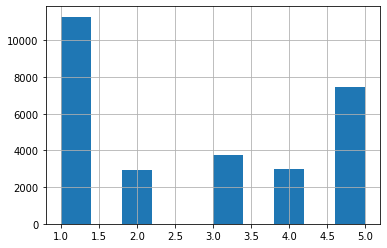

In [ ]:
df['score'].hist()

In [ ]:
def rating_to_label(rating):
    if rating > 4:
        return 1
    else:
        return 0
    
df['y'] = df['score'].apply(lambda x: rating_to_label(x))

In [ ]:
df["y"].value_counts()

0    20945
1     7479
Name: y, dtype: int64

모델의 Feature 변수는 리뷰에서 추출된 형태소와 그들의 중요도를 나타나는 tf_idf_vect로 대체

In [ ]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [ ]:
x_train.shape, y_train.shape

((19896, 9689), (19896,))

In [ ]:
x_test.shape, y_test.shape

((8528, 9689), (8528,))

### 모델 학습

####  Logistic Regression 모델 학습

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [ ]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.84
precision: 0.70
recall: 0.64
F1: 0.67


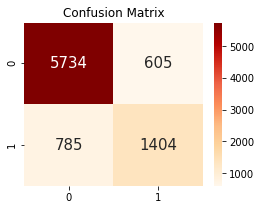

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

### 긍정 / 부정 키워드 분석

In [ ]:
lr.coef_

array([[ 0.52423916, -0.5812244 , -0.23860067, ..., -0.362089  ,
        -0.01636846, -1.58072609]])

[]

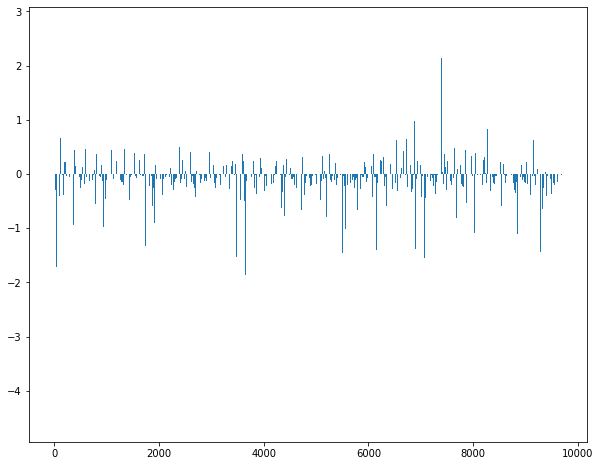

In [ ]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])
plt.plot()

- 여기서 계수가 양인 경우는 단어가 긍정적인 영향을 미쳤다고 볼 수 있고,   
-  반면에, 음인 경우는 부정적인 영향을 미쳤다고 볼 수 있습니다.  
-  이 계수들을 크기순으로 정렬하면, 긍정 / 부정 키워드를 출력하는 지표가 되겠습니다.
- 먼저 "긍정 키워드"와 "부정 키워드"의 Top 5를 각각 출력(단어의 coeficient와 index)

In [ ]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[-5:])

[(2.717338226645714, 8228), (2.267998497318673, 4092), (2.1454052085003665, 7395), (2.099591689411302, 7977), (2.0570600479935464, 5149)]
[(-3.3198788680541402, 7206), (-3.5068269426986274, 1490), (-3.9386749485145427, 8247), (-4.00820002659347, 581), (-4.5768381062874015, 7011)]


- 전체 단어가 포함한 "긍정 키워드 리스트"와 "부정 키워드 리스트"를 정의하고 출력


In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)
coef_pos_index

[(2.717338226645714, 8228),
 (2.267998497318673, 4092),
 (2.1454052085003665, 7395),
 (2.099591689411302, 7977),
 (2.0570600479935464, 5149),
 (2.034462114300118, 2296),
 (2.008025571294777, 204),
 (1.8719349797485272, 1895),
 (1.8340755352855103, 913),
 (1.7589445538014001, 1713),
 (1.7289751591095015, 8279),
 (1.704288779614593, 6067),
 (1.6730742044134124, 2709),
 (1.6701960902795927, 149),
 (1.5250491332078577, 1974),
 (1.4897662172360644, 9493),
 (1.448278198159566, 2248),
 (1.4243907893917107, 7828),
 (1.4163294740240184, 6559),
 (1.3635372878471728, 6256),
 (1.3480327909599685, 8892),
 (1.324185508280823, 8259),
 (1.3171739621343574, 7558),
 (1.3136061725232069, 6049),
 (1.29959335302505, 6655),
 (1.282545602439732, 7193),
 (1.2677063631869279, 6979),
 (1.2393014148354229, 79),
 (1.2176775583094321, 7561),
 (1.2099326898317844, 6064),
 (1.1483835872840653, 5117),
 (1.1135935126610483, 8411),
 (1.0712012146505978, 5126),
 (1.069174334199632, 231),
 (1.0681225704939683, 6670),
 (1

- index를 단어로 변환하여 "긍정 키워드 리스트"와 "부정 키워드 리스트"의 Top 20 단어를 출력

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{7828: '지니',
 3230: '뮤직',
 7070: '자체',
 1779: '단말기',
 5946: '오디오',
 1522: '노래',
 7011: '자꾸',
 8121: '처리',
 7206: '재생',
 1709: '다른',
 5891: '영상',
 581: '계속',
 5252: '안보',
 5821: '여요',
 2945: '멜론',
 7928: '진짜',
 3386: '반응속도',
 451: '검색',
 4518: '속도',
 261: '개선',
 2: '가격',
 9433: '호도',
 6535: '음악',
 5578: '어플',
 8247: '최악',
 4119: '사용',
 8582: '태블릿',
 2997: '모드',
 8370: '카카오',
 2546: '로그인',
 176: '갑자기',
 2544: '로그아웃',
 6319: '원래',
 5131: '아이디',
 6731: '이용',
 594: '계정은',
 3984: '비밀번호',
 8099: '찾기',
 1145: '기타',
 3440: '방법',
 2543: '로그',
 9403: '현재',
 7381: '정기',
 533: '결제',
 7763: '중이',
 968: '그냥',
 5953: '오류',
 2637: '리뷰',
 7797: '증상',
 9513: '확인',
 7386: '정도',
 1763: '다해',
 4752: '스트리밍',
 4339: '서비스',
 3100: '무선',
 6720: '이어폰',
 7: '가끔',
 41: '가사',
 6002: '오타',
 4600: '수정',
 5595: '언제',
 6443: '유저',
 3636: '변경',
 9264: '해달',
 6232: '용량',
 6559: '음질',
 3651: '별로',
 6639: '이동',
 8164: '체적',
 1374: '난국',
 9026: '플레이',
 2643: '리스트',
 2471: '랜덤',
 7756: '중복',
 1076: '기능',
 592: '계정',
 6758: '

In [ ]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

최고 2.717338226645714
사랑 2.267998497318673
정말 2.1454052085003665
짱짱 2.099591689411302
아주 2.0570600479935464
디자인 2.034462114300118
강추 2.008025571294777
대박 1.8719349797485272
굿굿 1.8340755352855103
다만 1.7589445538014001
축하 1.7289751591095015
완전 1.704288779614593
마음 1.6730742044134124
감사 1.6701960902795927
더욱 1.5250491332078577
화이팅 1.4897662172360644
듭니 1.448278198159566
지니 1.4243907893917107
음질 1.4163294740240184
우리 1.3635372878471728


In [ ]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

자꾸 -4.5768381062874015
계속 -4.00820002659347
최악 -3.9386749485145427
네트워크 -3.5068269426986274
재생 -3.3198788680541402
연결 -3.3081897517295715
갑자기 -3.219457701971585
오류 -3.21707194628509
로그인 -3.1495851064418106
개선 -3.0666012654939294
쓰레기 -2.825982472592434
접속 -2.7729169482078087
서버 -2.713046522089947
삭제 -2.662737208292336
결제 -2.623805775852999
몇번 -2.5465713856799033
무슨 -2.5070983596173533
와이파이 -2.4229031765157756
제발 -2.377023455668742
해지 -2.3274744798785796


### 분석결과 

키워드를 살펴보면:  
지니뮤직앱 사용자들은 음질과 디자인 등에 만족하는 것으로 보입니다.  
하지만 네트워크 연결, 접속, 서버 등에 개선이 필요해보입니다.